## Plot FOV of the dish

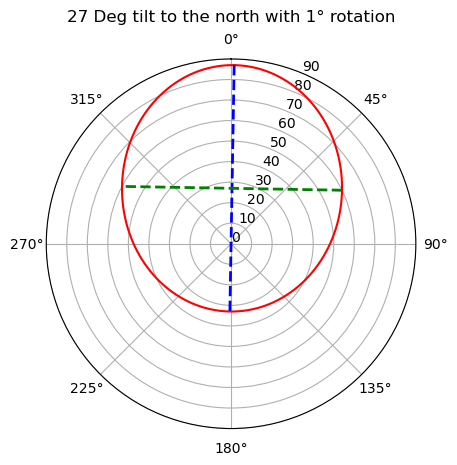

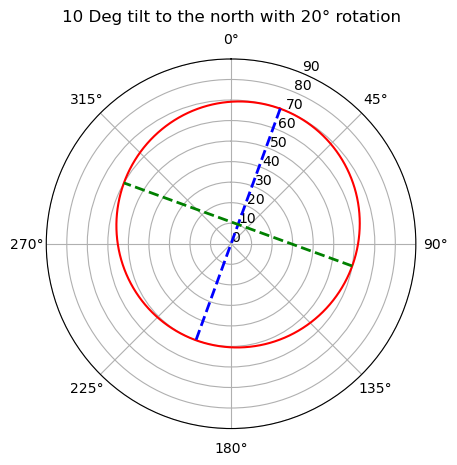

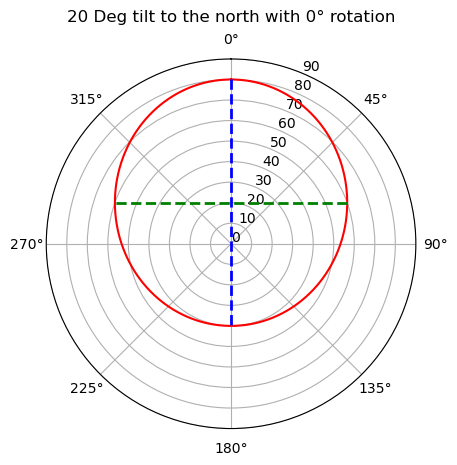

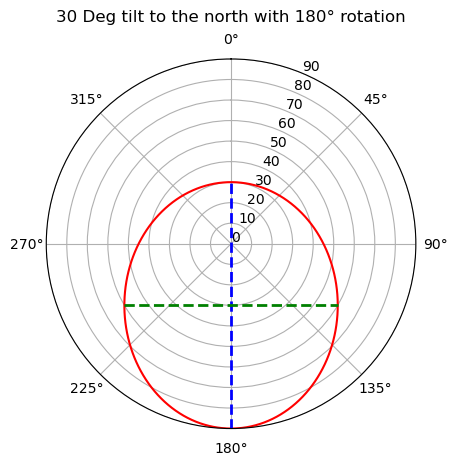

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math

def draw_fov(tilt_deg, rotation_deg=0):
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

    # Set up the plot limits
    ax.set_ylim(0, 90)
    ax.set_yticks(np.arange(0, 91, 10))
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    ax.grid(True)

    # Base radius of the FOV
    base_radius = 60

    # Calculate the FOV center and axes lengths
    center_shift = tilt_deg  # Center moves up by tilt_deg units per degree of tilt
    x_radius = base_radius   # x-axis radius remains constant
    y_radius = math.sqrt(base_radius**2 - tilt_deg**2)  # y-axis radius changes with tilt

    # Calculate the points for the oval
    theta = np.linspace(0, 2 * np.pi, 300)
    x = x_radius * np.cos(theta)
    y = y_radius * np.sin(theta)

    # Adjust the center position based on tilt
    x += center_shift

    # Convert to polar coordinates
    r = np.sqrt(x**2 + y**2)
    angles = np.arctan2(y, x)

    # Rotate the oval by adding the rotation angle in radians
    rotation_radians = np.deg2rad(rotation_deg)  # Convert degrees to radians
    angles += rotation_radians

    # Plot the oval
    ax.plot(angles, r, 'r')

    # Calculate and plot the major and minor axes of the oval
    # Major axis endpoints
    major_axis_x = np.array([center_shift + x_radius, center_shift - x_radius])
    major_axis_y = np.array([0, 0])

    # Minor axis endpoints
    minor_axis_x = np.array([center_shift, center_shift])
    minor_axis_y = np.array([y_radius, -y_radius])

    # Rotate the axes
    major_axis_angles = np.arctan2(major_axis_y, major_axis_x) + rotation_radians
    major_axis_r = np.sqrt(major_axis_x**2 + major_axis_y**2)
    minor_axis_angles = np.arctan2(minor_axis_y, minor_axis_x) + rotation_radians
    minor_axis_r = np.sqrt(minor_axis_x**2 + minor_axis_y**2)

    # Plot the major and minor axes
    ax.plot(major_axis_angles, major_axis_r, 'blue', linestyle='--', linewidth=2)
    ax.plot(minor_axis_angles, minor_axis_r, 'green', linestyle='--', linewidth=2)
    # Set plot title
    ax.set_title(f'{tilt_deg} Deg tilt to the north with {rotation_deg}° rotation', va='bottom')
    plt.show()

# Draw FOV for different tilts with a 20 degree rotation to the right
draw_fov(27, 1)   
draw_fov(10, 20)  
draw_fov(20, 0)  
draw_fov(30, 180)  


## Add random dots 

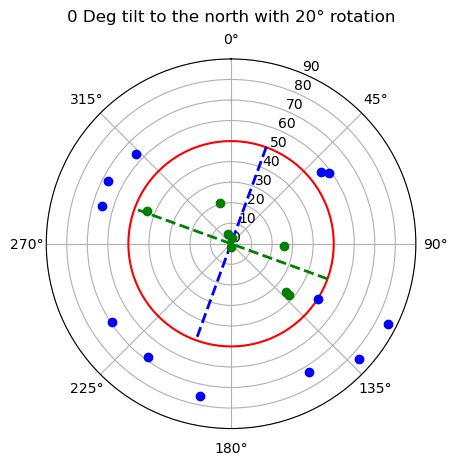

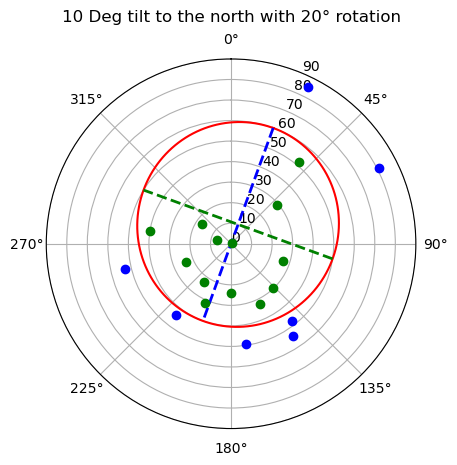

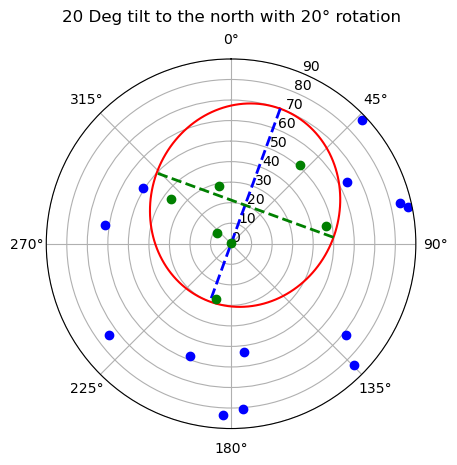

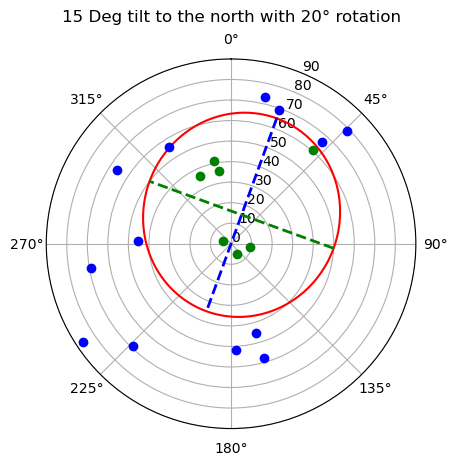

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import math

def draw_fov(tilt_deg, rotation_deg=0, num_points=10):
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

    # Set up the plot limits
    ax.set_ylim(0, 90)
    ax.set_yticks(np.arange(0, 91, 10))
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)
    ax.grid(True)

    # Base radius of the FOV
    base_radius = 50

    # Calculate the FOV center and axes lengths
    center_shift = tilt_deg  # Center moves up by tilt_deg units per degree of tilt
    x_radius = base_radius   # x-axis radius remains constant
    y_radius = math.sqrt(base_radius**2 - tilt_deg**2)  # y-axis radius changes with tilt

    # Calculate the points for the oval
    theta = np.linspace(0, 2 * np.pi, 300)
    x = x_radius * np.cos(theta)
    y = y_radius * np.sin(theta)

    # Adjust the center position based on tilt
    x += center_shift

    # Convert to polar coordinates
    r = np.sqrt(x**2 + y**2)
    angles = np.arctan2(y, x)
    
    # Rotate the oval by adding the rotation angle in radians
    rotation_radians = np.deg2rad(rotation_deg)  # Convert degrees to radians
    angles += rotation_radians

    # Plot the oval
    ax.plot(angles, r, 'r')
    # Calculate and plot the major and minor axes of the oval
    # Major axis endpoints (before rotation)
    major_axis_x = np.array([center_shift + x_radius, center_shift - x_radius])
    major_axis_y = np.array([0, 0])

    # Minor axis endpoints (before rotation)
    minor_axis_x = np.array([center_shift, center_shift])
    minor_axis_y = np.array([y_radius, -y_radius])

    # Rotate the axes
    def rotate_points(x, y, angle):
        """ Rotate points (x, y) by a given angle """
        x_rot = x * np.cos(angle) - y * np.sin(angle)
        y_rot = x * np.sin(angle) + y * np.cos(angle)
        return x_rot, y_rot

    # Rotate major axis
    major_axis_x_rot, major_axis_y_rot = rotate_points(major_axis_x, major_axis_y, rotation_radians)
    major_axis_angles = np.arctan2(major_axis_y_rot, major_axis_x_rot)
    major_axis_r = np.sqrt(major_axis_x_rot**2 + major_axis_y_rot**2)

    # Rotate minor axis
    minor_axis_x_rot, minor_axis_y_rot = rotate_points(minor_axis_x, minor_axis_y, rotation_radians)
    minor_axis_angles = np.arctan2(minor_axis_y_rot, minor_axis_x_rot)
    minor_axis_r = np.sqrt(minor_axis_x_rot**2 + minor_axis_y_rot**2)

    # Plot the major and minor axes
    ax.plot(major_axis_angles, major_axis_r, 'blue', linestyle='--', linewidth=2)
    ax.plot(minor_axis_angles, minor_axis_r, 'green', linestyle='--', linewidth=2)
    # Generate random points
    points_r = np.random.uniform(0, 90, num_points)
    points_angles = np.random.uniform(0, 2 * np.pi, num_points)

    # Check if points are inside the FOV
    inside_fov = []
    for r, angle in zip(points_r, points_angles):
        # Convert polar to Cartesian coordinates
        x_point = r * np.cos(angle)
        y_point = r * np.sin(angle)

        # Rotate points to check if they are inside the rotated FOV
        x_point_rot = x_point * np.cos(-rotation_radians) - y_point * np.sin(-rotation_radians)
        y_point_rot = x_point * np.sin(-rotation_radians) + y_point * np.cos(-rotation_radians)

        # Adjust center position based on tilt
        x_point_rot -= center_shift

        # Check if the point is inside the ellipse
        if (x_point_rot**2 / x_radius**2) + (y_point_rot**2 / y_radius**2) <= 1:
            inside_fov.append(True)
        else:
            inside_fov.append(False)

    # Plot the points
    for r, angle, inside in zip(points_r, points_angles, inside_fov):
        color = 'g' if inside else 'b'
        ax.plot(angle, r, 'o', color=color)

    # Set plot title
    ax.set_title(f'{tilt_deg} Deg tilt to the north with {rotation_deg}° rotation', va='bottom')

    # Display the plot
    plt.show()

# Draw FOV for different tilts with a 20 degree rotation to the right and random points
draw_fov(0, 20, num_points=20)   # 0 degrees tilt with 20 degrees rotation
draw_fov(10, 20, num_points=20)  # 10 degrees tilt with 20 degrees rotation
draw_fov(20, 20, num_points=20)  # 20 degrees tilt with 20 degrees rotation
draw_fov(15, 20, num_points=20)  # 15 degrees tilt with 20 degrees rotation
